In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models
from tensorflow import keras
import numpy as np

In [2]:
#(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
#(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train / 255
X_test = X_test / 255
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
x_val = X_train[:5000,:,:,:]
y_val = y_train[:5000]
x_train = X_train[5000:,:,:,:]
y_train = y_train[5000:]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\Users\fabri\anaconda3\envs\tensorflow-directml\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-f870b85dfa5f>", line 13, in <module>
    plt.xlabel(class_names[y_train[i][0]])
IndexError: invalid index to scalar variable.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\fabri\anaconda3\envs\tensorflow-directml\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'IndexError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\fabri\anaconda3\envs\tensorflow-directml\lib\site-packages\IPython\core\ultratb.py", line 1169, in get_records
    return _fixed_getinnerframes(etb, 

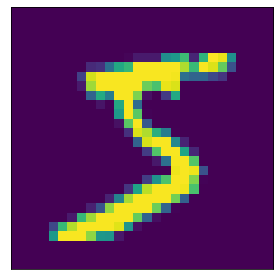

: 

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(28,28))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [ ]:
model = models.Sequential([
    layers.Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [1]:
model.summary()

NameError: name 'model' is not defined

In [ ]:
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=2)


In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
acc = history.History['acc']
val_acc = history.History['val_acc']
loss = history.History['loss']
val_loss = history.History['loss']
epochs = range(1,len(acc)+1)


plt.plot(epochs, acc, label='Training accuracy', marker='x')
plt.plot(epochs, val_acc, label='Validation accuracy' ,marker='o')
plt.title('Training and validation')
plt.lengend()
plt.figure()

plt.plot(epochs, loss,label='Training loss',marker='x')
plt.plot(epochs, val_loss, label='Validation loss' ,marker='o')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
y_predicted_by_model = model.predict(X_test)
y_predicted_by_model[0]

In [ ]:
np.argmax(y_predicted_by_model[0])

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted_by_model]

In [ ]:
y_predicted_labels[:5]